In [1]:
#Author: S M Abdullah Ferdous
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})
np.random.seed(31415) 

In [2]:
#First we going to read the concrete dataset in from xls file
#df = pd.read_table('wine.data') 
df = pd.read_csv('wine.data',header=None)
#df = pd.read_table('wine.names')
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#the coulmn names looks too lengthy.we can make the small and simple
df.columns = ['Class','Alcohol ','Malic acid','Ash',
                     'Alcalinity of ash ','Magnesium ','Total phenols ','Flavanoids ','Nonflavanoid phenols','Proanthocyanins','Color intensity ','Hue','OD280/OD315 of diluted wine','Proline']

In [4]:
#observe the dataset with shorter column names
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wine,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#checking the dimention of the datrset
df.shape

(178, 14)

In [6]:
#database information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                          178 non-null int64
Alcohol                        178 non-null float64
Malic acid                     178 non-null float64
Ash                            178 non-null float64
Alcalinity of ash              178 non-null float64
Magnesium                      178 non-null int64
Total phenols                  178 non-null float64
Flavanoids                     178 non-null float64
Nonflavanoid phenols           178 non-null float64
Proanthocyanins                178 non-null float64
Color intensity                178 non-null float64
Hue                            178 non-null float64
OD280/OD315 of diluted wine    178 non-null float64
Proline                        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
#checking for any missing values
df.describe().T
#we can see no missing values for any columns

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [8]:
#we can also check for null values like this
df.isnull().sum()

Class                          0
Alcohol                        0
Malic acid                     0
Ash                            0
Alcalinity of ash              0
Magnesium                      0
Total phenols                  0
Flavanoids                     0
Nonflavanoid phenols           0
Proanthocyanins                0
Color intensity                0
Hue                            0
OD280/OD315 of diluted wine    0
Proline                        0
dtype: int64

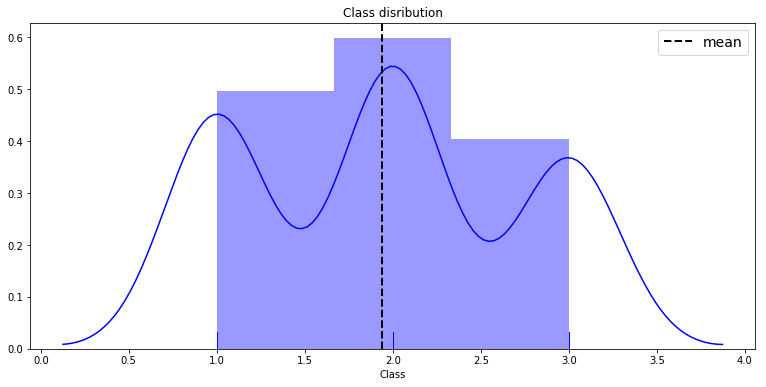

In [9]:
#we can check the distribution of the target label
plt.figure(figsize=(13,6))
sns.distplot(df["Class"],color="b",rug=True)
plt.axvline(df["Class"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Class disribution")
plt.show()

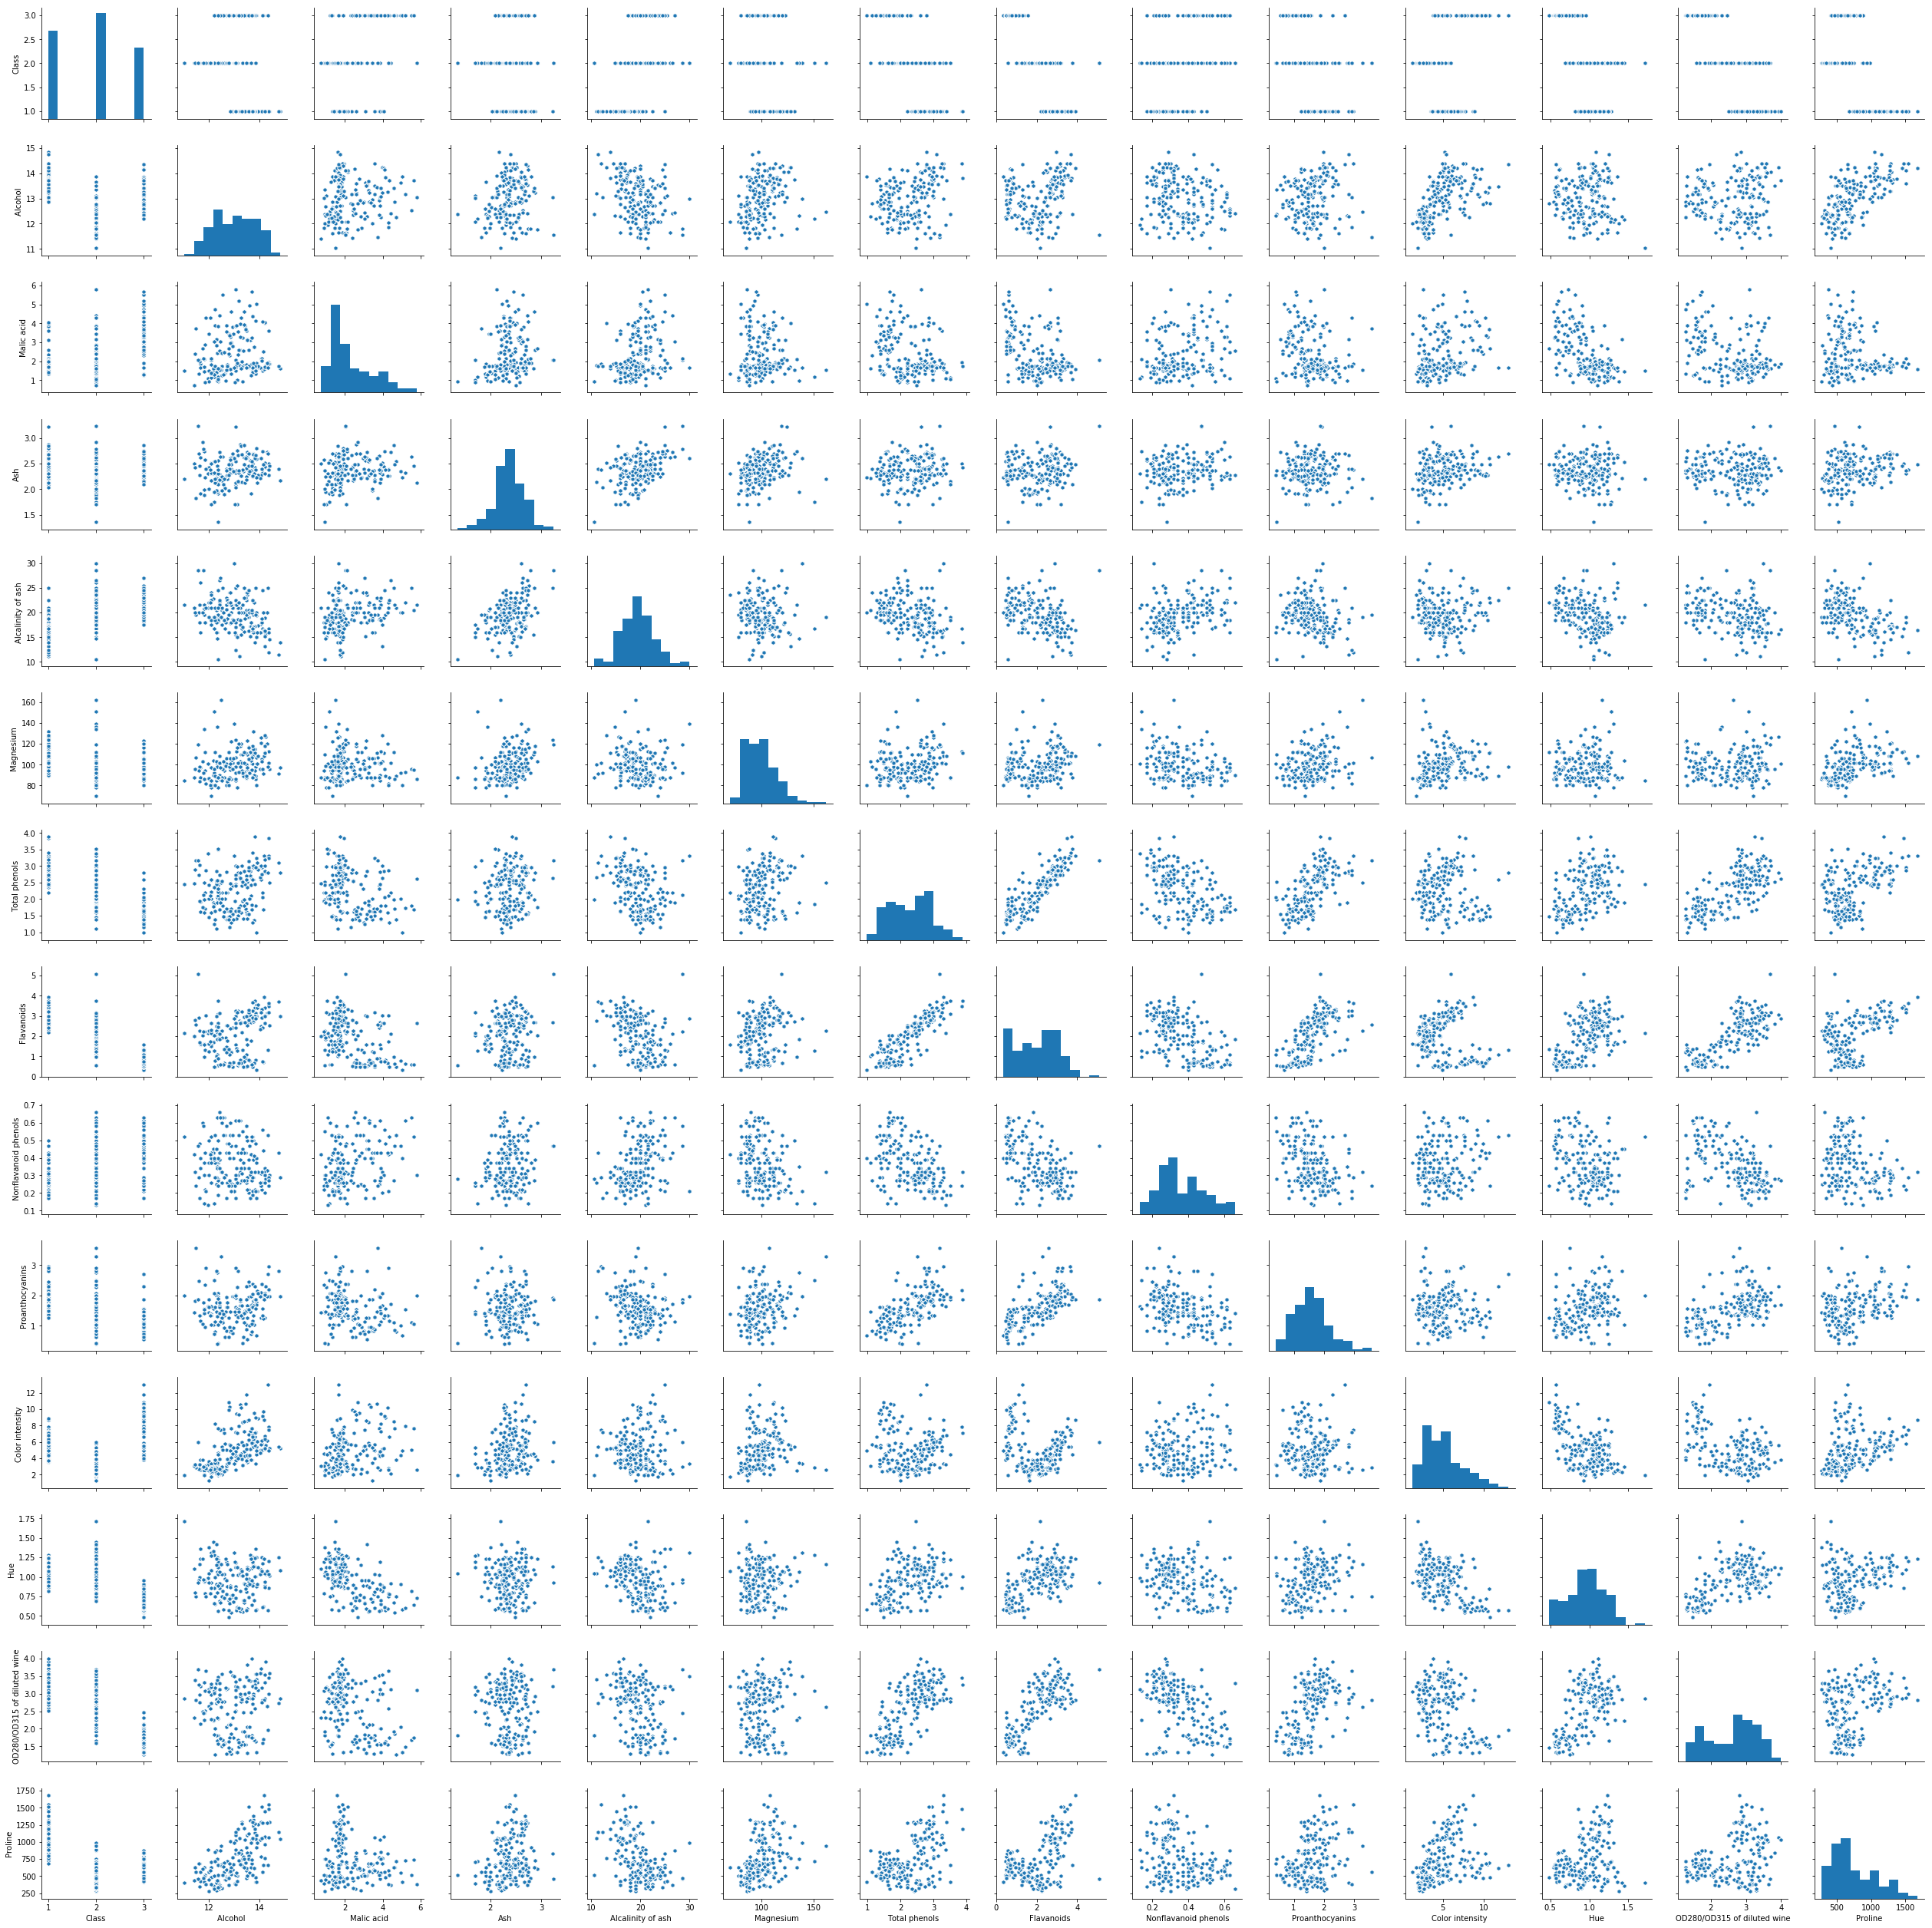

In [10]:
#we can see the relationship between the variables
sns.pairplot(df,markers="h")
plt.show()

In [11]:
#we can calcuate the ouliers for the dataset
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
cwo=((df.iloc[:] <(q1-1.5*IQR))|(df.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=df.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(df),2)
opdf

,No. of Outliers,Percentage Outliers
Class,0,0.00
Alcohol,0,0.00
Malic acid,3,1.69
Ash,3,1.69
Alcalinity of ash,4,2.25
Magnesium,4,2.25
Total phenols,0,0.00
Flavanoids,0,0.00
Nonflavanoid phenols,0,0.00
Proanthocyanins,2,1.12


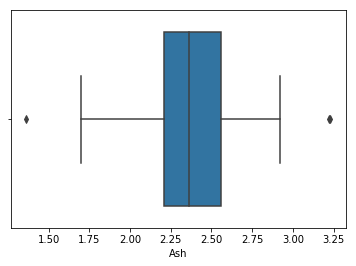

In [12]:

import seaborn as sns
sns.boxplot(x=df['Ash'])


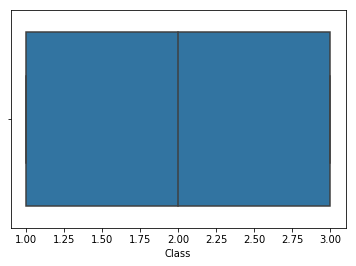

In [13]:
sns.boxplot(x=df['Class'])

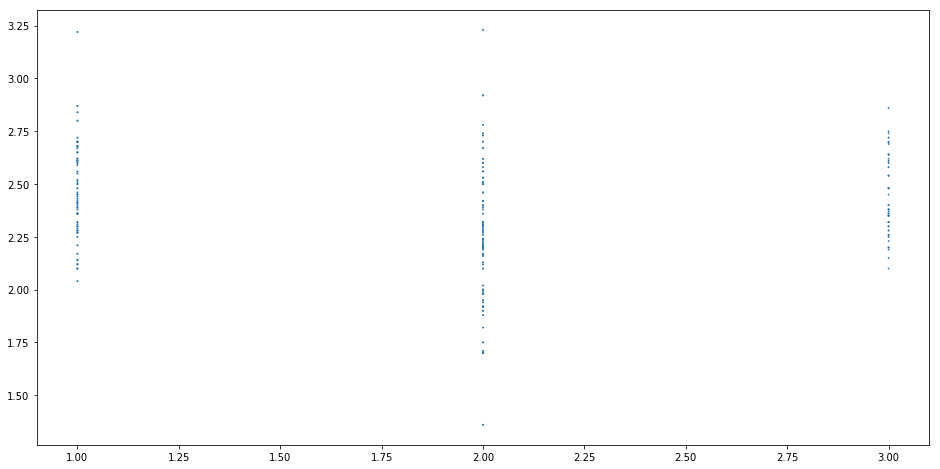

In [14]:
#we can also visualise ouliers like this
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Class'], df['Ash'],df['Hue'])
plt.show()

In [15]:
#using z score to find and remove outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.21394365 1.51861254 0.5622498  ... 0.36217728 1.84791957 1.01300893]
 [1.21394365 0.24628963 0.49941338 ... 0.40605066 1.1134493  0.96524152]
 [1.21394365 0.19687903 0.02123125 ... 0.31830389 0.78858745 1.39514818]
 ...
 [1.37386437 0.33275817 1.74474449 ... 1.61212515 1.48544548 0.28057537]
 [1.37386437 0.20923168 0.22769377 ... 1.56825176 1.40069891 0.29649784]
 [1.37386437 1.39508604 1.58316512 ... 1.52437837 1.42894777 0.59516041]]


In [16]:
#we can define thereshhold to see the outliers more clearly
threshold = 3
print(np.where(z > 3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7,  2, 10], dtype=int64))


In [17]:
#removeing the otliers
df = df[(z < 3).all(axis=1)]

In [18]:
#cheaking the dimention after removeing the outliers
df.shape

(168, 14)

In [19]:
#test ans train split
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]],
                                                   # df[[df.columns[0]]],
                                                   # test_size = .2,
                                                   # random_state = 2,
                                                   # shuffle=True)


In [20]:
df
#randomise the data in the data set
df=df.reindex(np.random.permutation(df.index))
X = df.iloc[:,1:13]
y = df.iloc[:,0]

In [21]:
y.head()

55     1
124    2
167    3
113    2
43     1
Name: Class, dtype: int64

### Min max scaler to data standarisation

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Shallow Neural Network
in this section we will implement and investigate a shallow neural network 

### K-fold validation Shallow neural network

In [23]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
scores = []
np.random.seed(31415)
cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    mlp = MLPClassifier(hidden_layer_sizes=(100,3))
    mlp.fit(X_train, y_train)
    scores.append(mlp.score(X_test, y_test))

### Accuracy of the model  and mean accuracy

In [24]:
#np.mean(scores)
print(scores)
np.mean(scores)

[0.9411764705882353, 0.8823529411764706, 0.8823529411764706, 1.0, 0.9411764705882353, 0.5882352941176471, 0.8823529411764706, 0.7058823529411765, 0.375, 0.8125]


0.8011029411764706

### confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = mlp.predict(X_test)
target_names = ['class 0', 'class 1', 'class 2']
confusion_matrix(y_pred, y_test)

array([[5, 0, 3],
       [0, 8, 0],
       [0, 0, 0]], dtype=int64)

### classification report includes f1 score

In [26]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.62      1.00      0.77         5
    class 1       1.00      1.00      1.00         8
    class 2       0.00      0.00      0.00         3

avg / total       0.70      0.81      0.74        16



### Roc Curve

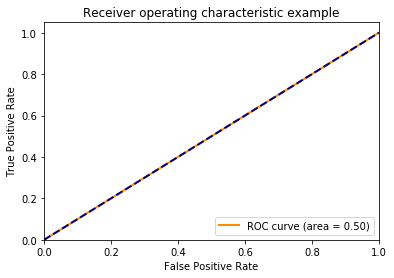

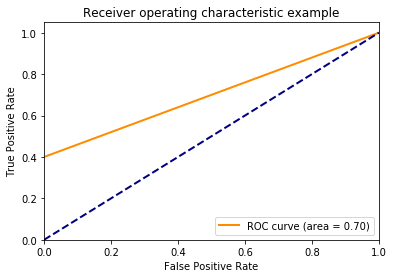

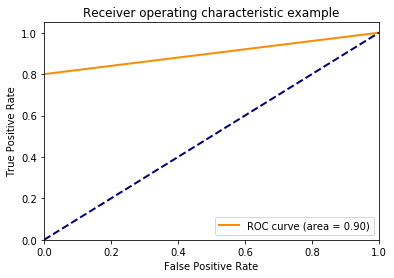

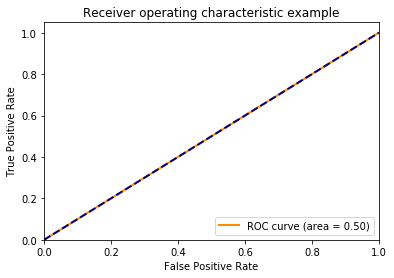

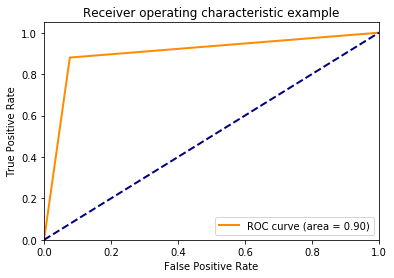

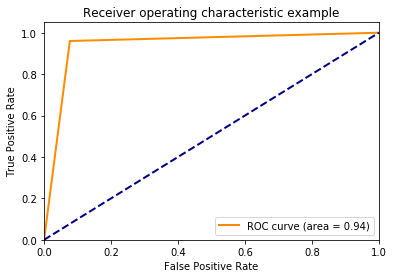

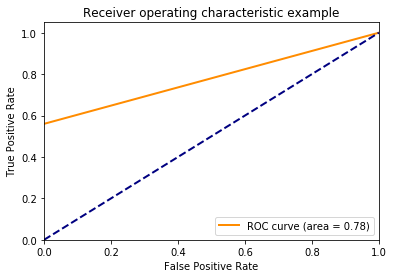

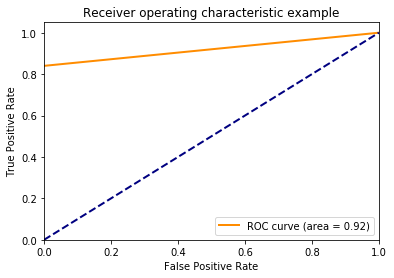

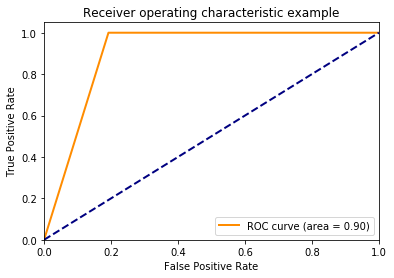

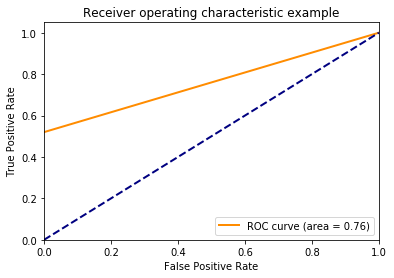

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    y = label_binarize(y, classes=[0, 1, 2])
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)
    mlp = MLPClassifier(hidden_layer_sizes=(100,3))
    mlp.fit(X_train, y_train)

    # Binarize the output
    n_classes = y.shape[1]

    # Add noisy features to make the problem harder
    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,3)))
    y_score = classifier.fit(X_train, y_train).predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    aucs = []
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Improveing Shallow neural network

In [28]:
#first we can set up some global variables which we gonna change and observe the outout of the model

#number of input, hidden and output nodes
learning_rate_inti = 0.001
batch_size = 50

# epochs is the number of training iterations 
max_iter = 10
tol=.0001


### SNN with various Max_iters

In [29]:
np.random.seed(31415)
max_iter= [150,200,250,500,1000]
results=[]
for max_iter in max_iter:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,3),max_iter=max_iter)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Max iter is :' +str(max_iter))
    print('Mean score is :' + str(np.mean(scores)))
    results.append(np.mean(scores))


Max iter is :150
Mean score is :0.4047794117647059
Max iter is :200
Mean score is :0.4878676470588236
Max iter is :250
Mean score is :0.4775735294117647
Max iter is :500
Mean score is :0.7676470588235293
Max iter is :1000
Mean score is :0.6599264705882353


In [30]:
#np.mean(scores)
print(results)
np.mean(scores)

[0.4047794117647059, 0.4878676470588236, 0.4775735294117647, 0.7676470588235293, 0.6599264705882353]


0.6599264705882353

### SNN with Various Learning rate

In [31]:

learning_rate_inti=[.001,.005,.010,.020,.050]
results=[]
np.random.seed(31415)
for learning_rate_inti in learning_rate_inti:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,3),learning_rate_init=learning_rate_inti)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Learning rate is ' +str(learning_rate_inti))
    print('Mean score is' + str(np.mean(scores)))
    results.append(np.mean(scores))
   

Learning rate is 0.001
Mean score is0.5665441176470589
Learning rate is 0.005
Mean score is0.7205882352941175
Learning rate is 0.01
Mean score is0.7231617647058824
Learning rate is 0.02
Mean score is0.8058823529411765
Learning rate is 0.05
Mean score is0.8882352941176471


In [32]:
#np.mean(scores)
print(results)
#np.mean(scores)

[0.5665441176470589, 0.7205882352941175, 0.7231617647058824, 0.8058823529411765, 0.8882352941176471]


### SNN with various batch size

In [33]:
batch_size=[50,100,150,250,400]
results=[]
np.random.seed(31415) 
for batch_size in batch_size:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,3),batch_size=batch_size)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Batch Size ' +str(batch_size))
    print('Mean score is' + str(np.mean(scores)))
    results.append(np.mean(scores))

Batch Size 50
Mean score is0.48235294117647065
Batch Size 100
Mean score is0.56875
Batch Size 150
Mean score is0.49632352941176466
Batch Size 250
Mean score is0.3654411764705882
Batch Size 400
Mean score is0.6805147058823529


### SNN with various solver

In [34]:
solver=['adam','sgd','lbfgs']
results=[]
np.random.seed(31415) 
for solver in solver:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,3),solver=solver)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Solver :' +str(solver))
    print('Mean score is :' + str(np.mean(scores)))
    results.append(np.mean(scores))

Solver :adam
Mean score is :0.5665441176470589
Solver :sgd
Mean score is :0.36470588235294116
Solver :lbfgs
Mean score is :0.6867647058823529


### SNN with various Activations

In [35]:
activation=['identity','logistic', 'tanh','relu']
results=[]
np.random.seed(31415) 
for activation in activation:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,3),activation=activation)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Activation :' +str(activation))
    print('Mean score is :' + str(np.mean(scores)))
    results.append(np.mean(scores))

Activation :identity
Mean score is :0.8047794117647058
Activation :logistic
Mean score is :0.29117647058823526
Activation :tanh
Mean score is :0.6643382352941176
Activation :relu
Mean score is :0.4040441176470589


### Grid Search SNN

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neural_network
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(1, 3), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)
clf_grid.fit(X, y)



GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'max_iter': [500, 1000, 1500], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'hidden_layer_sizes': array([1, 2]), 'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Printing grid search results for SNN

In [37]:
print("-------------------------Best Estimators--------------")
print(clf_grid.best_estimator_)
print("-------------------------Best Score--------------")
print(clf_grid.best_score_)
print("-------------------------Best params--------------")
print(clf_grid.best_params_)

-------------------------Best Estimators--------------
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
-------------------------Best Score--------------
0.9464285714285714
-------------------------Best params--------------
{'alpha': 0.0001, 'hidden_layer_sizes': 2, 'max_iter': 500, 'random_state': 0, 'solver': 'lbfgs'}


# Deep Neural Network

### K-fold validation Shallow neural network

In [38]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
scores = []
np.random.seed(3) 
cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    mlp = MLPClassifier(hidden_layer_sizes=(100,10))
    mlp.fit(X_train, y_train)
    scores.append(mlp.score(X_test, y_test))

### Accuracy and mean accuracy

In [39]:
#np.mean(scores)
print(scores)
np.mean(scores)

[0.9411764705882353, 0.7647058823529411, 0.8235294117647058, 0.9411764705882353, 0.9411764705882353, 0.47058823529411764, 0.9411764705882353, 0.9411764705882353, 1.0, 1.0]


0.8764705882352942

### Confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix
#clf.fit(X,y)
y_pred = mlp.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))


array([[3, 0, 0],
       [0, 5, 0],
       [0, 0, 8]], dtype=int64)

### Classification report includes f1 score

In [41]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1       1.00      1.00      1.00         5
    class 2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        13



### ROC Curve

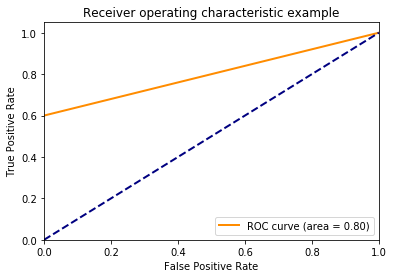

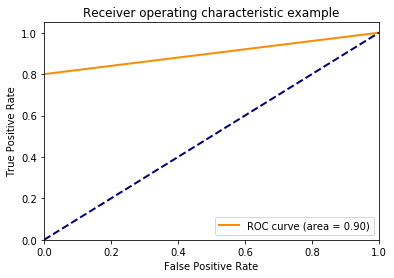

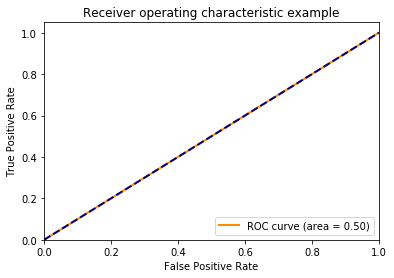

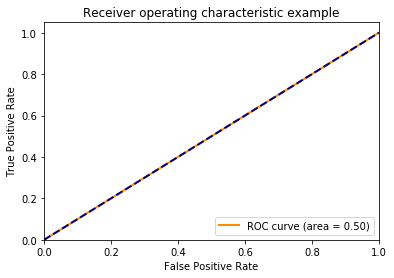

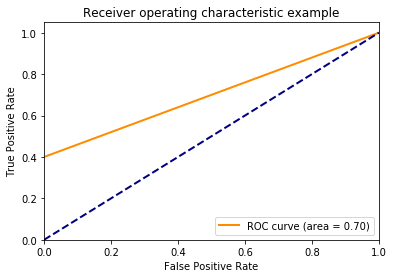

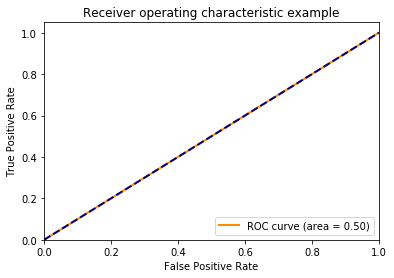

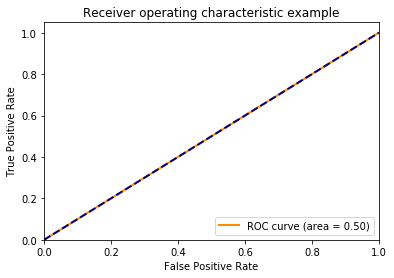

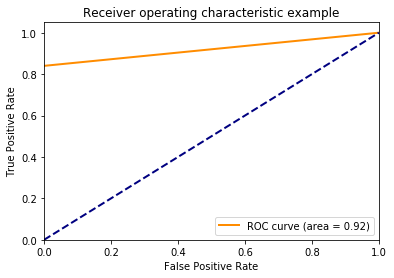

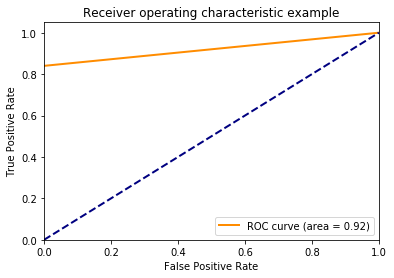

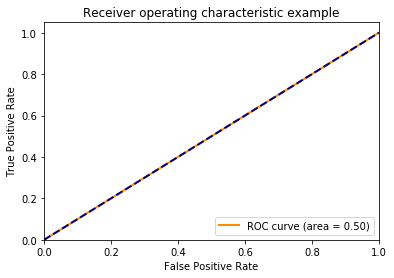

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #y = label_binarize(y, classes=[0, 1, 2])
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)
    mlp = MLPClassifier(hidden_layer_sizes=(100,3))
    mlp.fit(X_train, y_train)

    # Binarize the output
    n_classes = y.shape[1]

    # Add noisy features to make the problem harder
    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,3)))
    y_score = classifier.fit(X_train, y_train).predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    aucs = []
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Improveing deep neural network

### DNN with various max_iter

In [43]:
np.random.seed(3)
max_iter= [150,200,250,500,1000]
results=[]
for max_iter in max_iter:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,10),max_iter=max_iter)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Max iter is :' +str(max_iter))
    print('Mean score is :' + str(np.mean(scores)))
    results.append(np.mean(scores))

Max iter is :150
Mean score is :0.8882352941176471
Max iter is :200
Mean score is :0.9117647058823529
Max iter is :250
Mean score is :0.9470588235294117
Max iter is :500
Mean score is :0.9470588235294117
Max iter is :1000
Mean score is :0.9529411764705882


### DNN with various learning rate

In [44]:

learning_rate_inti=[.001,.005,.010,.020,.050]
results=[]
np.random.seed(3)
for learning_rate_inti in learning_rate_inti:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,10),learning_rate_init=learning_rate_inti)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Learning rate is ' +str(learning_rate_inti))
    print('Mean score is' + str(np.mean(scores)))
    results.append(np.mean(scores))

Learning rate is 0.001
Mean score is0.8764705882352942
Learning rate is 0.005
Mean score is0.9529411764705882
Learning rate is 0.01
Mean score is0.9529411764705882
Learning rate is 0.02
Mean score is0.9529411764705882
Learning rate is 0.05
Mean score is0.9588235294117646


### DNN with various batch size

In [45]:
batch_size=[50,100,150,250,400]
results=[]
np.random.seed(3) 
for batch_size in batch_size:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,10),batch_size=batch_size)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Batch size :' +str(batch_size))
    print('Mean score is :' + str(np.mean(scores)))
    results.append(np.mean(scores))

Batch size :50
Mean score is :0.8349264705882353
Batch size :100
Mean score is :0.9529411764705882
Batch size :150
Mean score is :0.6474264705882353
Batch size :250
Mean score is :0.9231617647058823
Batch size :400
Mean score is :0.8882352941176471


### DNN with diffrent solvers

In [46]:
solver=['adam','sgd','lbfgs']
results=[]
np.random.seed(3) 
for solver in solver:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,10),solver=solver)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Solver :' +str(solver))
    print('Mean score is :' + str(np.mean(scores)))
    results.append(np.mean(scores))

Solver :adam
Mean score is :0.8764705882352942
Solver :sgd
Mean score is :0.30404411764705885
Solver :lbfgs
Mean score is :0.9286764705882353


### DNN with various activation

In [47]:
activation=['identity','logistic', 'tanh','relu']
results=[]
np.random.seed(3) 
for activation in activation:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        mlp = MLPClassifier(hidden_layer_sizes=(100,10),activation=activation)
        mlp.fit(X_train, y_train)
        scores.append(mlp.score(X_test, y_test))
        #np.mean(scores)
        #print(scores)
        #print(np.mean(scores))
        #plt.plot(mlp.loss_curve_)
    print('Activation :' +str(activation))
    print('Mean score is :' + str(np.mean(scores)))
    results.append(np.mean(scores))

Activation :identity
Mean score is :0.9117647058823529
Activation :logistic
Mean score is :0.2797794117647059
Activation :tanh
Mean score is :0.9349264705882353
Activation :relu
Mean score is :0.9235294117647058


### gridSearch with DNN

In [48]:
parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(10, 100), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)
clf_grid.fit(X, y)


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'max_iter': [500, 1000, 1500], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'hidden_layer_sizes': array([10, 11, ..., 98, 99]), 'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Grid search results

In [49]:
print("-------------------------Best Estimators--------------")
print(clf_grid.best_estimator_)
print("-------------------------Best Score--------------")
print(clf_grid.best_score_)
print("-------------------------Best params--------------")
print(clf_grid.best_params_)

-------------------------Best Estimators--------------
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=6, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
-------------------------Best Score--------------
0.9642857142857143
-------------------------Best params--------------
{'alpha': 0.001, 'hidden_layer_sizes': 10, 'max_iter': 500, 'random_state': 6, 'solver': 'lbfgs'}


# Random Forrest

### Defineing values for random forrest

In [50]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier()

### running random forrest with 10 fold cross validation

In [51]:
# clf = RandomForestClassifier() #Initialize with whatever parameters you want to
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier()

# 10-Fold Cross validation
np.random.seed(3) 
clf.fit(X,y)
scores_clf = []
scores_clf.append(clf.score(X_test, y_test))

### mean accuracy and cross val accuracy

In [52]:
print (cross_val_score(clf, X, y, cv=10))
print (np.mean(cross_val_score(clf, X, y, cv=10)))

[1.         1.         0.88235294 0.94117647 1.         0.94117647
 1.         0.94117647 1.         1.        ]
0.9643382352941178


### Accuracy with confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
#clf.fit(X,y)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[3, 0, 0],
       [0, 5, 0],
       [0, 0, 8]], dtype=int64)

### Classification report

In [54]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1       1.00      1.00      1.00         5
    class 2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        13



### Roc Curve

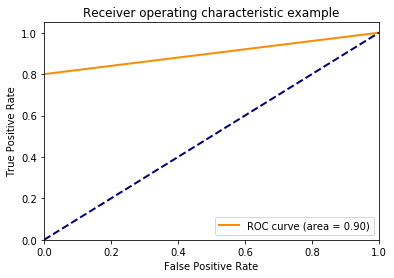

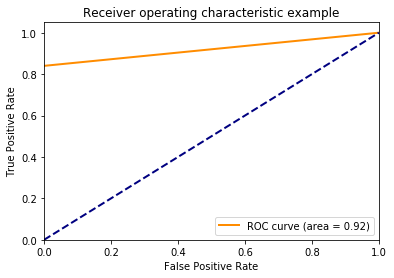

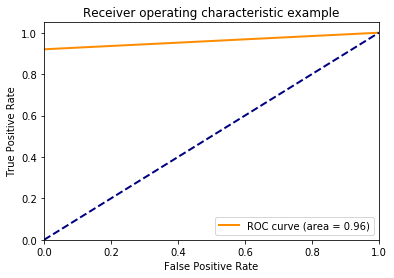

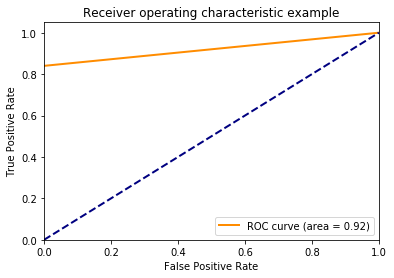

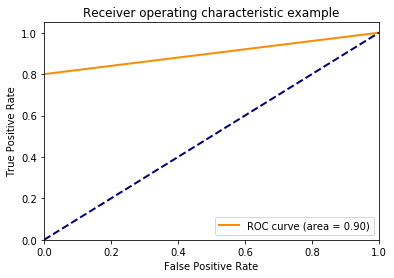

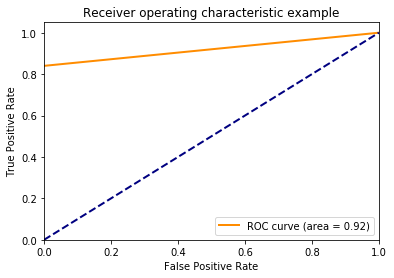

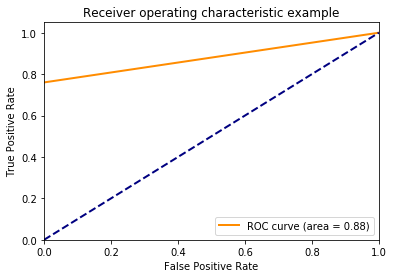

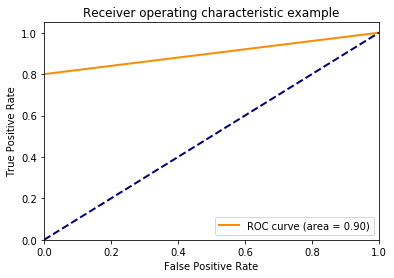

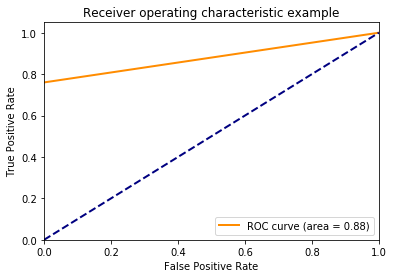

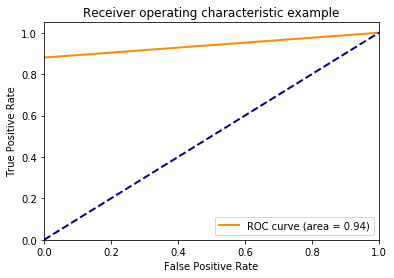

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #y = label_binarize(y, classes=[0, 1, 2])
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

    # Binarize the output
    n_classes = y.shape[1]

    # Add noisy features to make the problem harder
    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(RandomForestClassifier())
    y_score = classifier.fit(X_train, y_train).predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    aucs = []
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Improveing random forrest

### RF with various max depth

In [56]:
max_depth=[10,20,50,100,200]
results=[]
np.random.seed(31415) 
for max_depth in max_depth:
    scores_clf = []
    clf = RandomForestClassifier(max_depth=max_depth)
    # 10-Fold Cross validation 
    clf.fit(X,y)
    scores_clf = []
    scores_clf.append(clf.score(X_test, y_test))
    print('Max Depth :' +str(max_depth))
    print('Mean score is :' + str(np.mean(cross_val_score(clf, X, y, cv=10))))
    results.append(np.mean(scores_clf))
    #print (cross_val_score(clf, X, y, cv=10))
    #np.mean(cross_val_score(clf, X, y, cv=10))

Max Depth :10
Mean score is :0.9584558823529411
Max Depth :20
Mean score is :0.9647058823529411
Max Depth :50
Mean score is :0.9643382352941176
Max Depth :100
Mean score is :0.9647058823529411
Max Depth :200
Mean score is :0.9463235294117647


### RF with various sample split

In [57]:
min_samples_split = [10, 20, 30,40,50]
results=[]
np.random.seed(31415) 
for min_samples_split in min_samples_split:
    scores_clf = []
    clf = RandomForestClassifier(min_samples_split=min_samples_split)
    # 10-Fold Cross validation
    np.random.seed(31415) 
    clf.fit(X,y)
    scores_clf = []
    scores_clf.append(clf.score(X_test, y_test))
    print('Minimum Sample split :' +str(min_samples_split))
    print('Mean score is :' + str(np.mean(cross_val_score(clf, X, y, cv=10))))
    results.append(np.mean(scores))

Minimum Sample split :10
Mean score is :0.9702205882352942
Minimum Sample split :20
Mean score is :0.9584558823529411
Minimum Sample split :30
Mean score is :0.9463235294117647
Minimum Sample split :40
Mean score is :0.9345588235294118
Minimum Sample split :50
Mean score is :0.8691176470588236


### RF with various number of trees

In [58]:
n_estimators = [10, 50, 100,200,400]
results=[]
np.random.seed(31415) 
for n_estimators in n_estimators:
    scores_clf = []
    clf = RandomForestClassifier(n_estimators=n_estimators)
    # 10-Fold Cross validation
    np.random.seed(31415) 
    clf.fit(X,y)
    scores_clf = []
    scores_clf.append(clf.score(X_test, y_test))
    print('Minimum Sample split :' +str(n_estimators))
    print('Mean score is :' + str(np.mean(cross_val_score(clf, X, y, cv=10))))
    results.append(np.mean(scores))

Minimum Sample split :10
Mean score is :0.9584558823529411
Minimum Sample split :50
Mean score is :0.9764705882352942
Minimum Sample split :100
Mean score is :0.9823529411764707
Minimum Sample split :200
Mean score is :0.9764705882352942
Minimum Sample split :400
Mean score is :0.9823529411764707


### Gridsearch Random forrest

In [59]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
import pprint
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}

{'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [60]:
#creating the model
clf = RandomForestClassifier()
# Random search of parameters, using 3fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X, y)
clf.fit(X,y)
scores_clf = [] 
scores_clf.append(clf.score(X_test, y_test))
print('Mean score is :' + str(np.mean(cross_val_score(clf, X, y, cv=3))))
results.append(np.mean(scores_clf))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.3min finished


Mean score is :0.9404761904761906


In [61]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}